core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

Lewis Hamilton's race data for Silverstone 2023:
   DriverNumber BroadcastName Abbreviation  DriverId  TeamName TeamColor  \
44           44    L HAMILTON          HAM  hamilton  Mercedes    27F4D2   

      TeamId FirstName  LastName        FullName  ... CountryCode Position  \
44  mercedes     Lewis  Hamilton  Lewis Hamilton  ...         GBR      3.0   

    ClassifiedPosition GridPosition  Q1  Q2  Q3                   Time  \
44                   3          3.0 NaT NaT NaT 0 days 00:00:17.790000   

      Status Points  
44  Finished   15.0  

[1 rows x 21 columns]


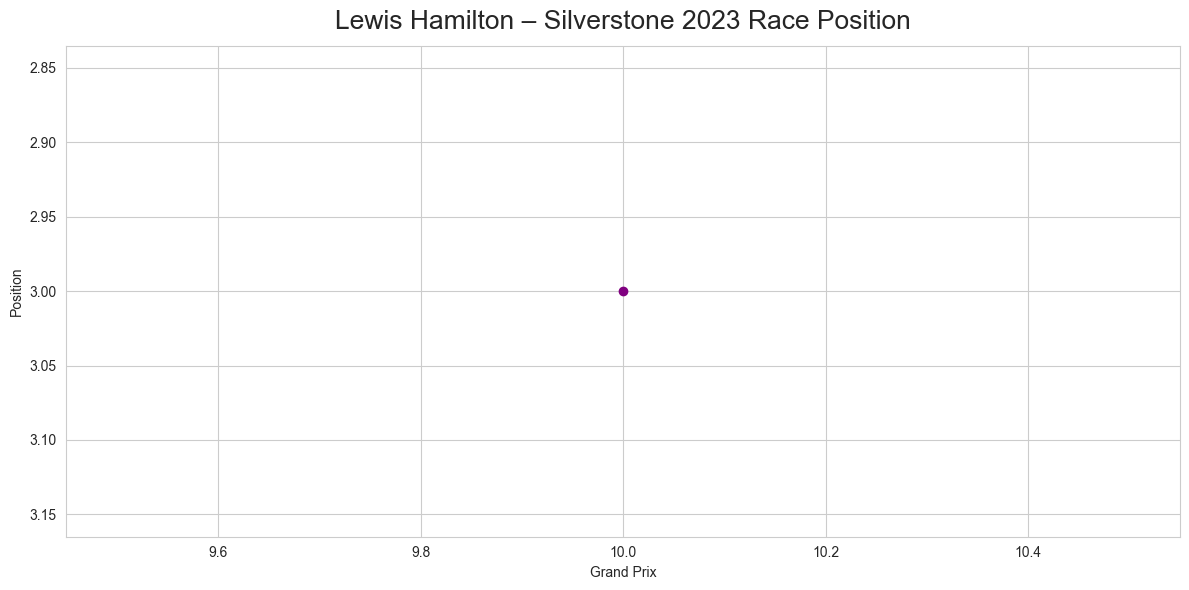

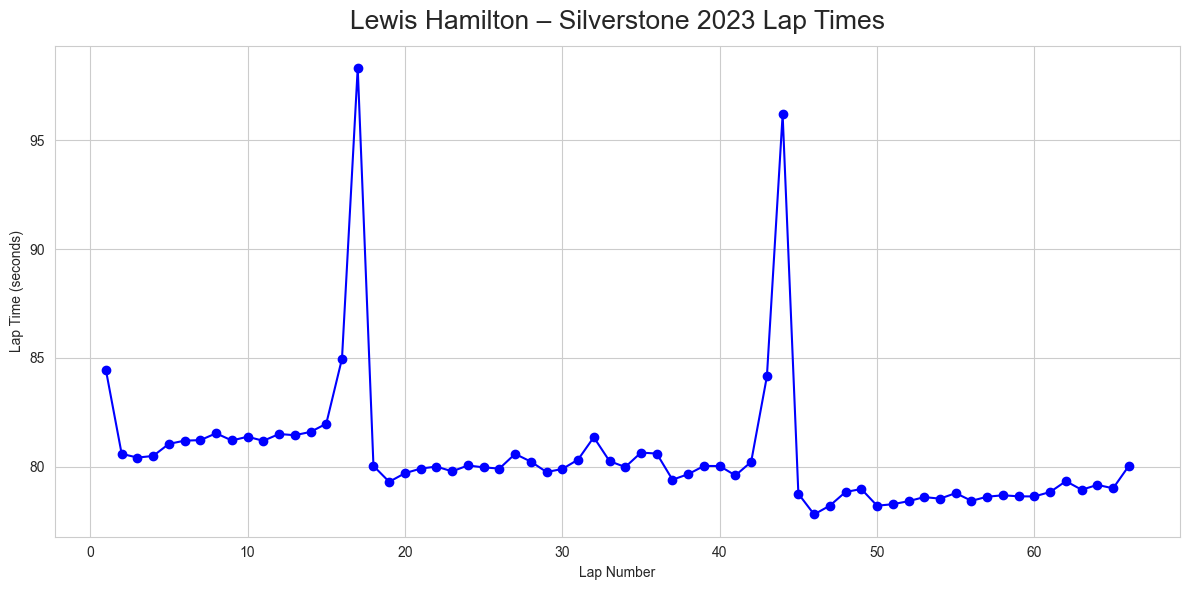

Final Position: 3.0
Points Earned: 15.0


In [10]:
# 🏁 Lewis Hamilton – Silverstone 2023 Race Performance

import fastf1
import matplotlib.pyplot as plt
import pandas as pd

# Enable cache for faster loading of data
fastf1.Cache.enable_cache('cache')

# Load Silverstone 2024 Race Session
season = 2024
round_number = 10  # Silverstone is round 10 of the 2023 season

# Get the Silverstone session data
session = fastf1.get_session(season, round_number, 'R')
session.load()

# Filter for Lewis Hamilton (using his driver abbreviation 'HAM')
hamilton = session.results.loc[session.results['Abbreviation'] == 'HAM']

# Check if Hamilton's data is available
if not hamilton.empty:
    print("Lewis Hamilton's race data for Silverstone 2023:")
    print(hamilton)
else:
    print("No data found for Lewis Hamilton in this session.")

# -------------------------------------------
# Visualize Hamilton's performance: Finishing position
plt.plot([round_number], [int(hamilton['Position'].values[0])], marker='o', color='purple')
plt.gca().invert_yaxis()  # Invert y-axis to show 1st place at the top
plt.title("Lewis Hamilton – Silverstone 2023 Race Position")
plt.ylabel("Position")
plt.xlabel("Grand Prix")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------
# Analyze his lap times (optional, visualizing lap-by-lap)
laps = session.laps

# Filter Hamilton's laps
hamilton_laps = laps[laps['Driver'] == 'HAM']

# Plot lap times over the race
plt.plot(hamilton_laps['LapNumber'], hamilton_laps['LapTime'].dt.total_seconds(), marker='o', color='blue')
plt.title("Lewis Hamilton – Silverstone 2023 Lap Times")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------
# Show summary for Hamilton’s performance in the race
print(f"Final Position: {hamilton['Position'].values[0]}")
print(f"Points Earned: {hamilton['Points'].values[0]}")
